In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/tomdursley/Downloads/Machines.csv") #For example

print(df.head())

   Machine Speed (RPM)  Material Thickness (mm)  Ambient Temperature (C)  \
0              102.484                    2.072                   20.217   
1               99.309                    2.112                   23.202   
2              103.238                    2.217                   25.016   
3              107.615                    2.211                   25.141   
4               98.829                    1.724                   23.650   

  Shift Pattern  Defects Count  Cycle Time (s) Operator Experience  \
0         Night             46           50.04        Intermediate   
1       Morning             49           50.19            Beginner   
2     Afternoon             54           50.56              Expert   
3         Night             43           47.04        Intermediate   
4         Night             50           50.41              Expert   

  Product Type  
0       Type A  
1       Type B  
2       Type B  
3       Type A  
4       Type A  


In [2]:
night_defects = df[df["Shift Pattern"] == "Night"]["Defects Count"]
day_defects = df[df["Shift Pattern"].isin(["Morning", "Afternoon"])]["Defects Count"]

In [3]:
night_normality = stats.shapiro(night_defects)
day_normality = stats.shapiro(day_defects)

print(f"Shapiro-Wilk Test (Night): Statistic={night_normality.statistic:.4f}, p-value={night_normality.pvalue:.4f}")
print(f"Shapiro-Wilk Test (Day): Statistic={day_normality.statistic:.4f}, p-value={day_normality.pvalue:.4f}")


Shapiro-Wilk Test (Night): Statistic=0.9746, p-value=0.1354
Shapiro-Wilk Test (Day): Statistic=0.9814, p-value=0.0825


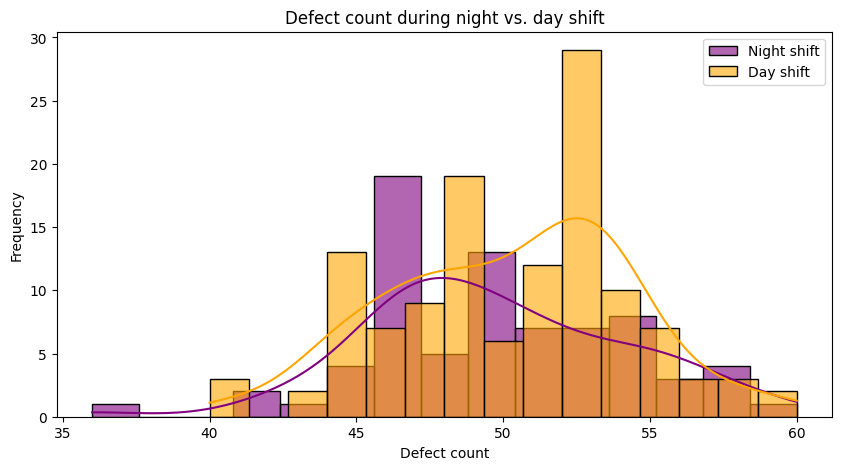

There are 3728 defects in total during the night shift!
There are 6280 defects in total during the day shift!


In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(night_defects, kde=True, color="purple", label="Night shift", bins=15, alpha=0.6)
sns.histplot(day_defects, kde=True, color="orange", label="Day shift", bins=15, alpha=0.6)

plt.xlabel("Defect count")
plt.ylabel("Frequency")
plt.title("Defect count during night vs. day shift")
plt.legend()
plt.show()

total_night_defects = np.sum(night_defects)
total_day_defects = np.sum(day_defects)

print(f"There are {total_night_defects} defects in total during the night shift!")
print(f"There are {total_day_defects} defects in total during the day shift!")


In [22]:


num_rolls = 10000

die = np.random.randint(1, 6, num_rolls)





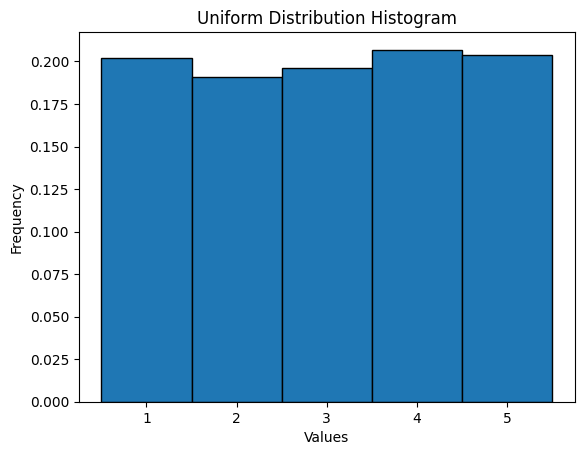

In [23]:
plt.hist(die, bins=np.arange(0.5, 5.6, 1), edgecolor='black', density=True)


plt.title('Uniform Distribution Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')


plt.show()

In [25]:
# how often to get a ball in a cup? probability of success = 0.7

# for 10 times
n = 15   # total tries
p = 0.7 # probability of success
k = 10   # desired number of successes

probability_of = stats.binom.pmf(k, n, p)
print(f"exactly 10 in? {round(probability_of * 100, 2)}%")

probability_at_least = 1 - stats.binom.pmf(k, n, p)
print(f"up to 10 in? {round(probability_at_least * 100, 2)}%")


exactly 10 in? 20.61%
up to 10 in? 79.39%


In [26]:
lambda_ = 3

# Probability of exactly 2 defects
p_2 = stats.poisson.pmf(2, lambda_)

# Probability of 5 or fewer defects
p_5_or_less = stats.poisson.cdf(5, lambda_)

print(f"Probability of exactly 2 defects: {p_2:.4f}")
print(f"Probability of 5 or fewer defects: {p_5_or_less:.4f}")

Probability of exactly 2 defects: 0.2240
Probability of 5 or fewer defects: 0.9161
